In [1]:
import pandas as pd

In [2]:
races = pd.read_csv('../data/eng/race.csv', index_col='id', parse_dates=True)
races.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 2562503 entries, 1356901.0 to 3185790.0
Data columns (total 12 columns):
horseid      float64
date         object
circuit      object
race         float64
track        float64
distance     object
addition     float64
placement    object
time         object
odds         object
driver       object
verklspar    float64
dtypes: float64(5), object(7)
memory usage: 254.2+ MB


In [3]:
races.date = pd.to_datetime(races.date, errors='coerce')

In [4]:
races.sample(15)

,horseid,date,circuit,race,track,distance,addition,placement,time,odds,driver,verklspar
id,,,,,,,,,,,,
592237.0,6581.0,2003-02-13,B,9.0,1.0,M,0.0,D,UG,66,Eri Ul,1.0
503095.0,8994.0,2001-09-20,Ö,0.0,1.0,M,0.0,P,359G,NaN,Lin Åk,1.0
2931025.0,85757.0,2017-09-02,KL,10.0,9.0,M,0.0,d,0ag,223,Kol La,9.0
2506319.0,90696.0,2015-06-26,F,5.0,3.0,M,0.0,d,ug,346,Kih Ör,4.0
2896477.0,86246.0,2017-06-22,RÄ,9.0,1.0,K,0.0,d,13g,40,Wes Ni,1.0
2998785.0,89485.0,2017-12-21,BT,3.0,2.0,M,0.0,2,299,60,AK Ras,2.0
1742049.0,40961.0,2011-04-05,AX,2.0,7.0,M,0.0,4,176a,116,Pet El,7.0
3021984.0,98599.0,2018-03-04,CH,1.0,2.0,M,0.0,2,159a,13,Juu St,10.0
1976015.0,45145.0,2012-08-30,Å,5.0,1.0,M,0.0,5,144a,171,Alb Bj,1.0


In [5]:
races.placement.unique()

array(['0', '3', '6', '4', 'k', '2', 'd', '7', '1', '5', '9', 'r', 'p',
       '8', nan, 'O', 'D', 'K', 'P', 'R', 'S', 's', '-', 'U', 'M', 'u'],
      dtype=object)

In [6]:
races['kmtime'] = pd.to_numeric(races.time, errors='coerce')/10

In [7]:
races['int_placement'] = pd.to_numeric(races.placement, errors='coerce').fillna(10).replace(0, 10)

In [8]:
races.horseid.unique().size

94673

In [9]:
races.loc[races.int_placement < 6].kmtime.min()

0.0

In [10]:
valid_races = races.loc[ (races.int_placement < 7) & (races.kmtime > 0)]
temp = valid_races.groupby('horseid')['kmtime'].agg(['mean', 'count']).sort_values(by='mean')
temp.loc[temp['count'] > 5].head()

,mean,count
horseid,,
64014.0,12.866667,6
73486.0,13.012500,8
84752.0,13.333333,6
69676.0,13.375000,8
78798.0,13.445455,11


In [11]:
valid_races.loc[valid_races.horseid == 64014.0]

,horseid,date,circuit,race,track,distance,addition,placement,time,odds,driver,verklspar,kmtime,int_placement
id,,,,,,,,,,,,,,
1719497.0,64014.0,2011-03-26,V,6.0,0.0,L,0.0,1,120,12,Raf Er,0.0,12.0,1.0
1719498.0,64014.0,2011-03-05,V,5.0,0.0,S,0.0,1,130,13,Raf Er,0.0,13.0,1.0
1719499.0,64014.0,2011-02-06,V,5.0,0.0,L,0.0,1,127,12,Raf Er,0.0,12.7,1.0
1719501.0,64014.0,2010-12-19,V,4.0,0.0,S,0.0,1,147,14,Raf Er,0.0,14.7,1.0
1770664.0,64014.0,2011-03-26,HV,6.0,0.0,L,0.0,1,120,12,Er Raf,0.0,12.0,1.0
1931750.0,64014.0,2012-03-03,V,3.0,0.0,S,0.0,1,128,16,Raf E,0.0,12.8,1.0


In [12]:
valid_races.loc[valid_races.horseid == 78798.0]

,horseid,date,circuit,race,track,distance,addition,placement,time,odds,driver,verklspar,kmtime,int_placement
id,,,,,,,,,,,,,,
2178569.0,78798.0,2013-11-03,E,6.0,13.0,M,1.0,1,140,19,Sva An,2.0,14.0,1.0
2342654.0,78798.0,2014-08-02,RÄ,11.0,9.0,M,1.0,5,129,131,Sva An,1.0,12.9,5.0
2395134.0,78798.0,2014-11-17,F,4.0,7.0,M,1.0,1,144,12,Kon Jo,4.0,14.4,1.0
2639017.0,78798.0,2016-03-09,Å,9.0,11.0,M,1.0,3,134,49,Jep CJ,6.0,13.4,3.0
2844602.0,78798.0,2017-03-29,S/Å,7.0,8.0,M,2.0,1,126,99,Uhr Th,4.0,12.6,1.0
2844699.0,78798.0,2017-03-29,Å,9.0,8.0,M,2.0,1,126,99,Uhr Th,2.0,12.6,1.0
2953345.0,78798.0,2017-08-29,AX,6.0,1.0,M,0.0,2,135,15,Söd St,1.0,13.5,2.0
3033484.0,78798.0,2017-12-17,V,6.0,1.0,L,0.0,4,142,470,Bar An,0.0,14.2,4.0
3034674.0,78798.0,2018-04-08,ÅR,1.0,5.0,M,1.0,1,136,28,Kon Jo,4.0,13.6,1.0


In [13]:
temp = valid_races.loc[ valid_races.date > pd.Timestamp('2018-10')]
temp = temp.groupby('horseid')['kmtime'].agg(['mean', 'count']).sort_values(by='mean')
temp.loc[temp['count'] > 5].head()

,mean,count
horseid,,
76532.0,13.916667,6
86463.0,14.916667,6
72134.0,15.400000,6
73403.0,15.550000,6
99956.0,16.000000,8


In [14]:
valid_races.loc[(valid_races.horseid == 76532.0) & (valid_races.date > pd.Timestamp('2018-10'))]

,horseid,date,circuit,race,track,distance,addition,placement,time,odds,driver,verklspar,kmtime,int_placement
id,,,,,,,,,,,,,,
3149749.0,76532.0,2018-11-15,BS,4.0,13.0,M,1.0,1,145,44,Lis An,7.0,14.5,1.0
3157819.0,76532.0,2018-11-22,BS,6.0,12.0,K,1.0,1,130,28,Lis An,3.0,13.0,1.0
3166565.0,76532.0,2018-12-14,RO,8.0,5.0,M,1.0,1,136,104,Lis An,1.0,13.6,1.0
3181904.0,76532.0,2019-01-19,S,10.0,4.0,L,5.0,3,150,144,Lis An,4.0,15.0,3.0
3186463.0,76532.0,2019-02-16,RO,9.0,7.0,ML,1.0,1,137,14,Lis An,3.0,13.7,1.0
3186802.0,76532.0,2019-02-16,RO,9.0,7.0,M,1.0,1,137,14,Lis An,3.0,13.7,1.0


In [15]:
races.distance.unique()

array(['L', 'M', 'K', 'S', 'MN', 'KN', 'KV', 'Mn', nan, 'Mv', 'MV', 'Kn',
       'KT', 'LN', 'Kv', 'Ln', 'MT', 'Kt', 'Mt', 'LT', 'LV', 'SN', 'Sn',
       'St', 'Lv', 'Lt', 'SV', 'ST', 'S5', '24', '20', '26', '11', '31',
       '22', '17', '16', '21', 'Sv', 'ML', 'KL', 'LL', 'SL'], dtype=object)

In [16]:
valid_races.groupby('driver')['kmtime'].mean().nsmallest(20)

driver
Ph Dau    11.100000
Dre Yv    12.566667
Ma Mot    12.700000
Len M     12.800000
All El    12.900000
Pou G     13.100000
Fr Ann    13.133333
Baz Je    13.137500
Coz Ch    13.200000
Mol Sa    13.200000
Bla Fr    13.275000
Jd Ros    13.300000
Pi Ver    13.300000
GA Pou    13.333333
Lab JL    13.433333
Ma Col    13.500000
Wi Big    13.500000
An Dol    13.600000
Tho Ke    13.600000
Ang Al    13.700000
Name: kmtime, dtype: float64

In [17]:
valid_races.groupby('driver')['kmtime'].count().nlargest(20)

driver
Ohl Ul    9614
Goo Bj    7705
Kon Jo    6694
Kih Ör    5793
N         5486
Adi Er    5012
Jan To    4829
Lin OA    4514
And MJ    4459
Söd St    4401
Sva Åk    4061
Uhr Th    3830
Unt Pe    3733
Öst Jo    3732
Sju Jö    3671
Lin CE    3658
Eri Sö    3528
Tak Jo    3472
Eri Ul    3431
Nor Ja    3381
Name: kmtime, dtype: int64

In [18]:
valid_races.groupby('horseid')['kmtime'].count().nlargest(20)

horseid
48576.0    103
82063.0     98
18309.0     97
56256.0     91
37318.0     88
21069.0     87
36757.0     87
17419.0     82
47940.0     82
49187.0     81
67806.0     79
10758.0     78
47220.0     76
23782.0     75
23843.0     75
31487.0     75
56615.0     75
53191.0     72
40410.0     71
26563.0     70
Name: kmtime, dtype: int64

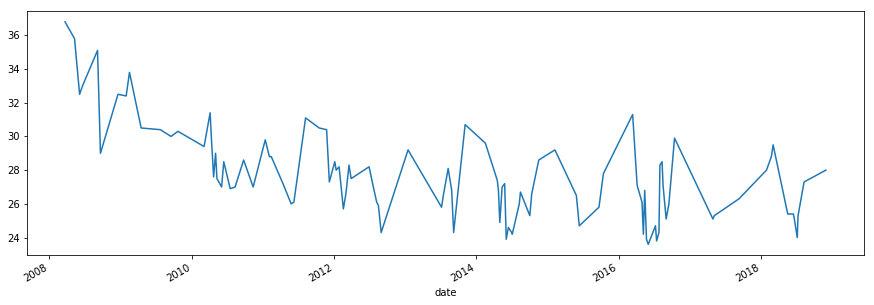

In [19]:
%matplotlib inline

temp = valid_races.loc[valid_races.horseid == 48576]
temp = temp.set_index('date')
temp['kmtime'].plot(figsize=(15,5));

In [20]:
races.head()

,horseid,date,circuit,race,track,distance,addition,placement,time,odds,driver,verklspar,kmtime,int_placement
id,,,,,,,,,,,,,,
1356901.0,591.0,2009-01-22,G,8.0,7.0,L,1.0,0,179,651,Red Da,7.0,17.9,10.0
1355774.0,51169.0,2009-01-09,B,2.0,11.0,M,0.0,3,190,100,Hol PÅ,11.0,19.0,3.0
1356818.0,39640.0,2009-01-08,Ö,4.0,5.0,K,0.0,6,174a,37,Kon Jo,5.0,NaN,6.0
1355772.0,51743.0,2009-01-09,B,2.0,2.0,M,0.0,0,200,80,Wal Kr,2.0,20.0,10.0
1366458.0,41394.0,2009-02-18,S,5.0,15.0,M,1.0,0,166,1211,Lar FB,9.0,16.6,10.0


In [21]:
temp = races.reset_index().drop_duplicates(subset=['id', 'horseid'])
temp.groupby(temp.date)['id'].count().sort_index(ascending=False).head(25)

date
2019-03-04      2
2019-03-03      2
2019-03-01    193
2019-02-28    155
2019-02-27     43
2019-02-26     80
2019-02-25    212
2019-02-24    137
2019-02-23    254
2019-02-22    156
2019-02-21     63
2019-02-20    195
2019-02-19     68
2019-02-18    125
2019-02-17    296
2019-02-16    276
2019-02-15    296
2019-02-14    190
2019-02-13    309
2019-02-12    166
2019-02-11    164
2019-02-10    201
2019-02-09    237
2019-02-08    280
2019-02-07    263
Name: id, dtype: int64

In [22]:
races.shape

(2562503, 14)

In [23]:
races.date.min()

Timestamp('2001-01-01 00:00:00')

In [24]:
races.date.max()

Timestamp('2019-03-04 00:00:00')

In [25]:
races.odds = pd.to_numeric(races.odds, errors='coerce')/10

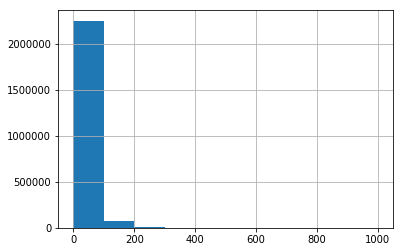

In [26]:
races.odds.hist();

# Booking commission
 If you bet on all horses. How much do you loose?
 
 sum of inverse odds

In [27]:
races.head()

,horseid,date,circuit,race,track,distance,addition,placement,time,odds,driver,verklspar,kmtime,int_placement
id,,,,,,,,,,,,,,
1356901.0,591.0,2009-01-22,G,8.0,7.0,L,1.0,0,179,65.1,Red Da,7.0,17.9,10.0
1355774.0,51169.0,2009-01-09,B,2.0,11.0,M,0.0,3,190,10.0,Hol PÅ,11.0,19.0,3.0
1356818.0,39640.0,2009-01-08,Ö,4.0,5.0,K,0.0,6,174a,3.7,Kon Jo,5.0,NaN,6.0
1355772.0,51743.0,2009-01-09,B,2.0,2.0,M,0.0,0,200,8.0,Wal Kr,2.0,20.0,10.0
1366458.0,41394.0,2009-02-18,S,5.0,15.0,M,1.0,0,166,121.1,Lar FB,9.0,16.6,10.0


In [28]:
races.shape

(2562503, 14)

In [30]:
races.index.unique().shape

(2533925,)

In [33]:
unique_races = races[['date', 'circuit', 'race']].drop_duplicates()

In [36]:
import numpy as np

unique_races['race_id'] = np.arange(unique_races.shape[0])

In [39]:
races = races.merge(unique_races)

In [50]:
%%time

def booker_fee(race):
    return np.sum(1/race['odds']) - 1

booker_fees = races.groupby(races.race_id).apply(booker_fee)

CPU times: user 1min 25s, sys: 679 ms, total: 1min 25s
Wall time: 1min 25s


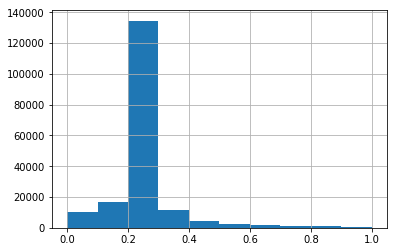

In [53]:
booker_fees[ (np.isfinite(booker_fees)) & (booker_fees > 0) & ((booker_fees < 1))].hist();

# Quite high VIG
https://www.pinnacle.com/en/betting-articles/educational/betting-margin-calculator/SZ9JZEGZ3NN9FVWT

https://en.wikipedia.org/wiki/Vigorish

In [55]:
races.groupby('race_id').count()['horseid'].mean()

7.38308331658789

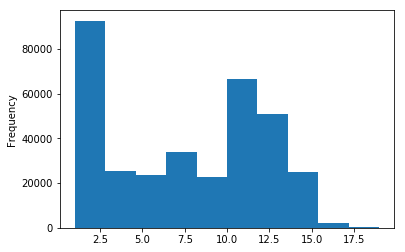

In [61]:
temp = races.groupby('race_id').count()['horseid']
temp[temp < 20].plot(kind='hist');

In [63]:
temp.nlargest()

race_id
1473     1258
63201      63
29101      54
6511       52
20434      45
Name: horseid, dtype: int64

In [69]:
races[races.int_placement == 1].groupby('horseid')['int_placement'].count().nlargest()

horseid
12299.0    155
30179.0     75
56435.0     66
70244.0     60
43484.0     59
Name: int_placement, dtype: int64

In [70]:
races.head()

,horseid,date,circuit,race,track,distance,addition,placement,time,odds,driver,verklspar,kmtime,int_placement,race_id
0,591.0,2009-01-22,G,8.0,7.0,L,1.0,0,179,65.1,Red Da,7.0,17.9,10.0,0
1,48034.0,2009-01-22,G,8.0,5.0,L,0.0,0,189,32.4,Ols Da,5.0,18.9,10.0,0
2,40834.0,2009-01-22,G,8.0,12.0,L,1.0,6,176,1.8,Kon Jo,12.0,17.6,6.0,0
3,44711.0,2009-01-22,G,8.0,13.0,L,1.0,1,174,8.8,Len Pe,13.0,17.4,1.0,0
4,35824.0,2009-01-22,G,8.0,2.0,L,0.0,4,181,170.7,Kos Ja,2.0,18.1,4.0,0


In [71]:
races[races.int_placement == 1].groupby('driver')['int_placement'].count().nlargest()

driver
Goo Bj    6177
Ohl Ul    4790
N         4588
Kon Jo    4294
Kih Ör    4196
Name: int_placement, dtype: int64

In [73]:
%ls ../data/eng/

age.csv          curcuit.csv      mtime.csv        programe.csv
coach.csv        driver.csv       note.csv         race.csv
comment.csv      driverban.csv    odds.csv         stallion.csv
commentreg.csv   gamedev.csv      owners.csv
commentstat.csv  guarantee.csv    price.csv
competition.csv  horse.csv        pricemoney.csv


In [74]:
horse = pd.read_csv('../data/eng/horse.csv')

In [75]:
horse.head()

,id,name,earnings,earningsii,earningperstart,pliar1,plthisyear2,plthisyear3,startsthisyear,plfgar1,...,homecircuit,v75wins,v75starts,v75procent,stallionid,mothersfatherid,coachid,ownerid,key,activated
0,50867,KOLAR SKAFFER,176850.0,100550.0,4570.0,0.0,0.0,0.0,10.0,3.0,...,H,NaN,NaN,NaN,4296.0,988.0,463.0,4088.0,556217.0,2011-05-18
1,2,A DE NIK GRANDE,135535.0,62364.0,2150.0,0.0,0.0,0.0,0.0,1.0,...,NaN,0.0,0.0,0.0,3.0,4.0,7261.0,31218.0,196099.0,NaN
2,5,A ONE,106542.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,...,NaN,0.0,0.0,0.0,13.0,0.0,2.0,2.0,0.0,NaN
3,7,A SIGN FROM HEAVEN,44900.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,15.0,1645.0,3.0,376.0,0.0,2010-02-08
4,50866,ASPE LEON,0.0,1600.0,0.0,0.0,0.0,0.0,1.0,0.0,...,H,NaN,NaN,NaN,276.0,885.0,570.0,21596.0,570499.0,NaN
